# Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


### Task 2:
1.	The data is divided over two tables, which is inconvenient for doing analysis. Using the merge function, merge them into one data frame using the Accident_Index field. 

In [2]:
# TODO: read the first csv file 
dfA = pd.read_csv('Accidents_2015.csv', header = 0,
                 quotechar='"',sep=",",
                 na_values = ['na', '-', '.', ''], low_memory=False)
# TODO: read the first csv file 
dfC = pd.read_csv('Casualties_2015.csv', header = 0,
                 quotechar='"',sep=",",
                 na_values = ['na', '-', '.', ''], low_memory=False)

# TODO: Perform the merge 
df_merged = pd.merge(dfA, dfC, left_on='Accident_Index', 
                        right_on = 'Accident_Index')
df_merged

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,201501BS70001,525130.0,180050.0,-0.198465,51.505538,1,3,1,1,12/01/2015,...,7,3,5,1,0,0,2,0,-1,-1
1,201501BS70002,526530.0,178560.0,-0.178838,51.491836,1,3,1,1,12/01/2015,...,5,3,9,9,0,0,2,0,1,3
2,201501BS70004,524610.0,181080.0,-0.205590,51.514910,1,3,1,1,12/01/2015,...,6,3,1,3,0,0,2,0,1,6
3,201501BS70005,524420.0,181080.0,-0.208327,51.514952,1,3,1,1,13/01/2015,...,2,3,5,1,0,0,2,0,1,2
4,201501BS70008,524630.0,179040.0,-0.206022,51.496572,1,2,2,1,09/01/2015,...,8,2,0,0,0,0,0,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186184,2015984141415,314050.0,579638.0,-3.348646,55.103676,98,3,13,7,31/12/2015,...,1,3,0,0,2,0,0,9,1,-1
186185,2015984141415,314050.0,579638.0,-3.348646,55.103676,98,3,13,7,31/12/2015,...,5,3,0,0,0,0,0,9,1,2
186186,2015984141415,314050.0,579638.0,-3.348646,55.103676,98,3,13,7,31/12/2015,...,4,3,0,0,0,0,0,9,2,5
186187,2015984141415,314050.0,579638.0,-3.348646,55.103676,98,3,13,7,31/12/2015,...,6,3,0,0,0,0,0,9,3,-1


2.	The "Accident_Severity" variable needs to be recoded. You need to replace the code by: 1=Minor, 2=Medium, 3=Severe.

In [3]:
severity_rank = ['Minor', 'Medium', 'Severe']
dfA_2 = dfA.copy()
for i in range(len(severity_rank)):
    j = i + 1
    dfA_2.loc[dfA_2['Accident_Severity'] == j, 'Accident_Severity'] = severity_rank[i]
dfA_2

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,201501BS70001,525130.0,180050.0,-0.198465,51.505538,1,Severe,1,1,12/01/2015,...,0,0,4,1,1,0,0,1,1,E01002825
1,201501BS70002,526530.0,178560.0,-0.178838,51.491836,1,Severe,1,1,12/01/2015,...,0,0,1,1,1,0,0,1,1,E01002820
2,201501BS70004,524610.0,181080.0,-0.205590,51.514910,1,Severe,1,1,12/01/2015,...,0,1,4,2,2,0,0,1,1,E01002833
3,201501BS70005,524420.0,181080.0,-0.208327,51.514952,1,Severe,1,1,13/01/2015,...,0,0,1,1,2,0,0,1,2,E01002874
4,201501BS70008,524630.0,179040.0,-0.206022,51.496572,1,Medium,2,1,09/01/2015,...,0,5,1,2,2,0,0,1,2,E01002814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140051,2015984139115,312087.0,570791.0,-3.376671,55.023855,98,Severe,3,1,11/12/2015,...,0,0,1,1,2,0,0,2,1,NaN
140052,2015984139715,320671.0,569791.0,-3.242159,55.016316,98,Severe,2,1,02/12/2015,...,0,0,1,1,2,0,0,2,1,NaN
140053,2015984140215,311731.0,586343.0,-3.387067,55.163502,98,Medium,1,4,23/12/2015,...,0,0,6,4,2,0,0,2,1,NaN
140054,2015984140515,328273.0,570137.0,-3.123385,55.020580,98,Severe,3,3,26/12/2015,...,0,0,1,2,2,0,0,2,1,NaN


3.	For a set of variables, missing values has been replaced by -1. Detect these values and report the names of the columns in each table that contain such values.

In [4]:
dfA_3 = dfA.copy()
for col in dfA_3.columns:
    dfA_3.loc[dfA_3[col] == -1] = None

4.	For all variables, check if there are any clearly extreme values, or values that do not belong in that column. If you find any, remove these records from the dataset.

In [5]:
dataTypeSeries = dfA.dtypes
continuous_var = list()
for col_idx in range(len(dfA.columns)):
    if (dataTypeSeries[col_idx] == "float64"):
        continuous_var.append(dfA.columns[col_idx])
continuous_var


['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', 'Latitude']

In [6]:
# TODO: for each column except the label column, compute the standard deviation of the columns
# report all the values that are at distance > 3 * std from the mean value as outliers.
def stat_outliers (col):
    outliers = set()
    m = col.mean()
    s = col.std()
    for p in col.unique():
        if (abs(p-m) > 3 * s):
            outliers.add(p)
    return outliers

for col in continuous_var:
    print("Outliers in column ", dfA[col], " are: ", stat_outliers(dfA[col]))

Outliers in column  0         525130.0
1         526530.0
2         524610.0
3         524420.0
4         524630.0
            ...   
140051    312087.0
140052    320671.0
140053    311731.0
140054    328273.0
140055    314050.0
Name: Location_Easting_OSGR, Length: 140056, dtype: float64  are:  {151552.0, 131074.0, 147459.0, 151558.0, 151048.0, 146956.0, 138765.0, 146957.0, 81935.0, 151568.0, 161810.0, 151571.0, 146452.0, 159251.0, 158226.0, 142872.0, 133659.0, 148508.0, 155678.0, 125988.0, 141864.0, 137256.0, 156714.0, 148523.0, 127531.0, 119348.0, 142389.0, 148534.0, 149049.0, 142399.0, 145985.0, 144454.0, 149077.0, 148569.0, 131679.0, 147552.0, 157286.0, 147558.0, 150634.0, 152687.0, 152176.0, 155760.0, 146039.0, 160379.0, 153725.0, 137345.0, 146051.0, 150661.0, 161926.0, 143499.0, 148619.0, 147090.0, 147091.0, 146578.0, 153235.0, 153236.0, 159897.0, 148121.0, 152734.0, 147105.0, 75426.0, 150692.0, 146598.0, 123050.0, 160431.0, 135857.0, 148657.0, 129720.0, 150715.0, 147643.0, 15685

5.	Compute a variable called is_minor , that checks whether a casualty was a minor or an adult. Being adult is defined as having an age of 18 or above. The column should only contain the values ‘Yes’ and ‘No’. The field name is "Age_of_Casualty" in the "Casualties_2015.csv" table. 

In [7]:
dfC_4 = dfC.copy()
dfC_4.loc[dfC_4['Age_of_Casualty'] < 18, 'is_Minor'] = "Yes"
dfC_4.loc[dfC_4['Age_of_Casualty'] >= 18, 'is_Minor'] = "No"
dfC_4

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile,is_Minor
0,201597UA71710,2,1,1,2,75,10,3,0,0,0,0,0,9,3,-1,No
1,201597UA71810,2,1,2,2,63,9,2,0,0,0,4,0,11,3,-1,No
2,201597UA71810,2,2,2,2,75,10,2,0,0,0,4,0,11,1,-1,No
3,201597UA71810,2,3,2,1,78,11,2,0,0,0,4,0,11,1,-1,No
4,201597UA71810,2,4,2,1,67,10,2,0,0,0,4,0,11,1,-1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186184,201597UA71412,2,2,2,2,10,2,3,0,0,2,0,0,9,1,-1,Yes
186185,201597UA71412,2,3,1,1,46,8,3,0,0,0,0,0,9,1,-1,No
186186,201597UA71510,1,1,3,2,52,8,3,6,9,0,0,0,0,1,-1,No
186187,201597UA71610,2,1,1,2,42,7,3,0,0,0,0,0,9,-1,-1,No


6.	The 'Location_Easting_OSGR' variable has about 27 of missing values - solve this with imputation of the average of the 'Location_Easting_OSGR' of all records. That means, calculate the average of all the available values in 'Location_Easting_OSGR' and fill the missing cells in the column with the average value. 

### Task 3:

For this task, use the dataset pid.csv. This dataset were publicly available but it has been removed from the repository so use it for this assignment and don’t redistribute it. The name of the table and the names of the columns has been changed to anonymize the data. 

In [8]:
df_pid = pd.read_csv('pid.csv', header = 0,
                 quotechar='"',sep=",",
                 na_values = ['na', '-', '.', ''])

1.	Remove the disguised values from the table -- We need to remove the values that equal 0 from columns C,D and F as these are missing values but they have been disguised by the value 0. Remove the value but keep the record (i.e.) change the value to null

In [9]:
df_pid_1 = df_pid.copy()
for col in ['C', 'D', 'F']:
    df_pid_1.loc[df_pid_1[col] == 0] = None

2.	Remove the Label column and remove one of the columns if their correlation is greater than 0.5. That is, if there are two columns with correlation value > 0.5 then remove one of them and keep the other. The input for this step is the original dataframe not the one that has been produced at step 1.

In [10]:
df_pid_cor = df_pid.copy()
df_pid_cor = df_pid_cor[df_pid_cor.columns[0:8]]
corr_mat = df_pid_cor.corr()
corr_mat

,A,B,C,D,E,F,G,H
A,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
B,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
C,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
D,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
E,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
F,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
G,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
H,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


In [11]:
# Find the columns that have correlation greater than 0.5 
# and store the name of one of them in the extra_cols list
extra_cols = list()
for i in range(len(df_pid_cor.columns)):
    j = 0
    while (j < i):        
        if (corr_mat.iloc[j, i] >= 0.5):
            f_col_name = corr_mat.columns[j]            
            extra_cols.append(f_col_name)
        j = j + 1

# Now, extract the columns other than the redundant ones
new_df_cols = list(set(df_pid_cor.columns).difference(set(extra_cols)))
new_df = df_pid_cor[new_df_cols]
new_df

,G,C,E,H,D,F,B
0,0.627,72,0,50,35,33.6,148
1,0.351,66,0,31,29,26.6,85
2,0.672,64,0,32,0,23.3,183
3,0.167,66,94,21,23,28.1,89
4,2.288,40,168,33,35,43.1,137
...,...,...,...,...,...,...,...
763,0.171,76,180,63,48,32.9,101
764,0.340,70,0,27,27,36.8,122
765,0.245,72,112,30,23,26.2,121
766,0.349,60,0,47,0,30.1,126


3.	Use a Python or R-library to find the principal components and project the data on those components. Plot the projected data on the first and the second (principal components) PCs as a scatter plot. If you are working with R, use the (prcomp) R-function. For Python, check https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html 

In [12]:
features = df_pid.columns[:8]
# Separating out the features
x = df_pid.loc[:, features].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [13]:
pca1 = PCA(n_components = 8)               # You can also use pca = PCA(2)
pcs1 = pca1.fit_transform(x)
pcsDF1 = pd.DataFrame(data = pcs1, columns = ['PC'+str(i+1) for i in range(8)])

In [14]:
pcsDF_red = pcsDF1[['PC1', 'PC2']]

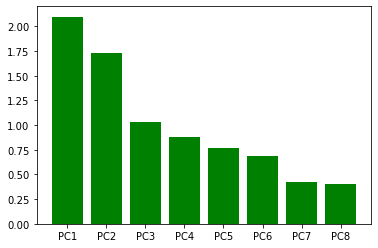

In [15]:
eigenvectors1, eigenvalues1 = pca1.components_, pca1.explained_variance_
plt.bar(np.array(range(8)), eigenvalues1, color = 'green')
plt.xticks(np.array(range(8)), (['PC'+str(i+1) for i in range(8)]))
plt.show()

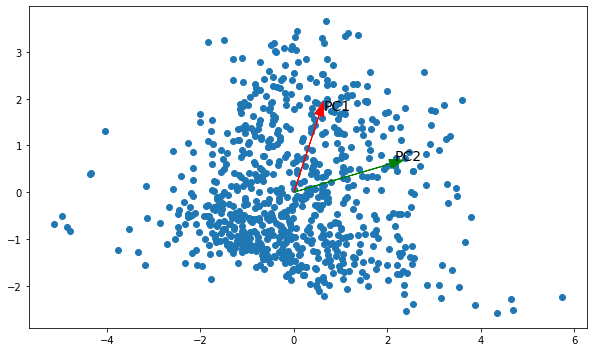

In [16]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(pcsDF1["PC1"], pcsDF1["PC2"])
K = 2
mu = pcs1.mean(axis=0)

i = 1
for axis, color in zip(eigenvectors1[:K], ["red","green"]):
#     start, end = mu, mu + sigma * axis ### leads to "ValueError: too many values to unpack (expected 2)"

    # So I tried this but I don't think it's correct
    start, end = (mu)[:K], (mu + 2 * eigenvalues1[i-1] * axis)[:K]
    pc = 'PC'+str(i)
    ax.arrow(start[0], start[1], end[0], end[1], head_width=0.2, head_length=0.3, fc = color, ec=color)
    ax.annotate(pc, (end[0] + 0.05 * eigenvalues1[i-1], end[1] + 0.05 * eigenvalues1[i-1]),fontsize=14)
    i += 1


ax.set_aspect('equal')
plt.show()